# 201 ZIP Profile Study

In this notebook, we will be analyzing profiles of ZIP Code areas to answer Research Question 2.
## RQ2. What effect does local competition have on businesses?

- Are businesses clustered by rating?
- Does competition effect Closure Rate of businesses?
- What impact do chain franchises have on their area?

### input;
'ZIPprofiles.pkl'

## Setup

In [1]:
import os
import sys
import pandas as pd
from sklearn import datasets, linear_model
import math
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%matplotlib inline

First let's set up our graph defaults.

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, linees, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 14

Now let's load our dataframe.

In [3]:
ZIPdf = pd.read_pickle('../../data/analysis/ZIPprofiles.pkl')

We can see below that we have 1514 different ZIP entries

In [4]:
ZIPdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1514 entries, 02224 to YO22
Data columns (total 16 columns):
state                1514 non-null object
num_businesses       1514 non-null int64
num_open             1514 non-null int64
%closed              1514 non-null float64
num_reviews          1514 non-null float64
num_checkins         1514 non-null float64
num_tips             1514 non-null float64
num_interactions     1514 non-null float64
open_rating          1476 non-null float64
closed_rating        931 non-null float64
std.dev_rating       1182 non-null float64
open_categories      1514 non-null object
closed_categories    1514 non-null object
chains               1514 non-null object
num_chains           1514 non-null int64
%chains              1514 non-null float64
dtypes: float64(9), int64(3), object(4)
memory usage: 201.1+ KB


# Overview of ZIP Profiles

### What is the distribution of the number of businesses in each area?
<p>Below we see that most areas have a low number of businesses in and around the 0-100 mark.</p>

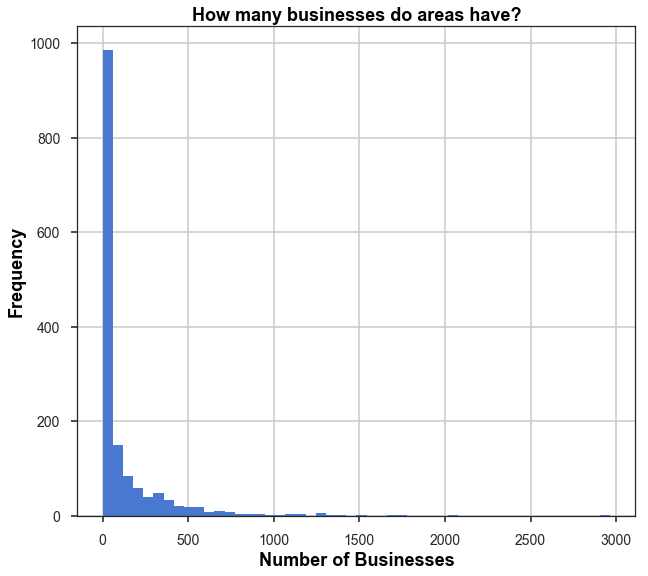

In [5]:
# Legend False as it wasn't useful to have.
plot = ZIPdf.plot(kind = 'hist', y = 'num_businesses', figsize = (10,9), bins = 50,\
                                           legend = False)

plot.set_xlabel("Number of Businesses")
plot.set_title("How many businesses do areas have?")

Let's take a closer look at the lower range of 'Number of Businesses'.

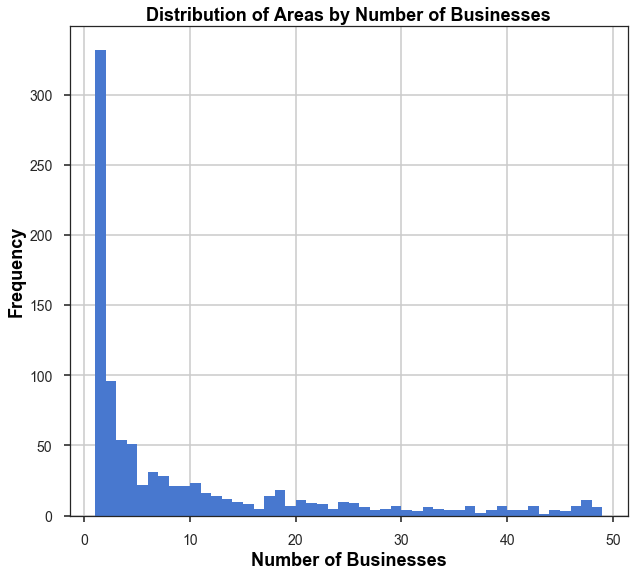

In [6]:
plot = ZIPdf[ZIPdf['num_businesses']<50].plot(kind = 'hist', y = 'num_businesses', figsize = (10,9), bins = 48,\
                                           legend = False)

plot.set_xlabel("Number of Businesses")
plot.set_title("Distribution of Areas by Number of Businesses")

There's quite a large proportion of areas with only a few businesses. Let's focus on areas with greater business presence. We'll focus on areas with more than 10 businesses.

In [7]:
myMask = (ZIPdf['num_businesses'] > 10)
print("There are still ", ZIPdf[myMask]['num_businesses'].count(), " areas after filtering by number of businesses.")

There are still  835  areas after filtering by number of businesses.


### Ratings of open businesses in our ZIP code profiles
<p>The majority of areas exist between, 3 and 5 stars. There appears to be very few businesses below 3 stars.</p>
<p>Ratings of open businessses appear to have a similar distribution to closed businesses, although it appears that closed businesses skews slightly towards higher ratings at first glance.</p>

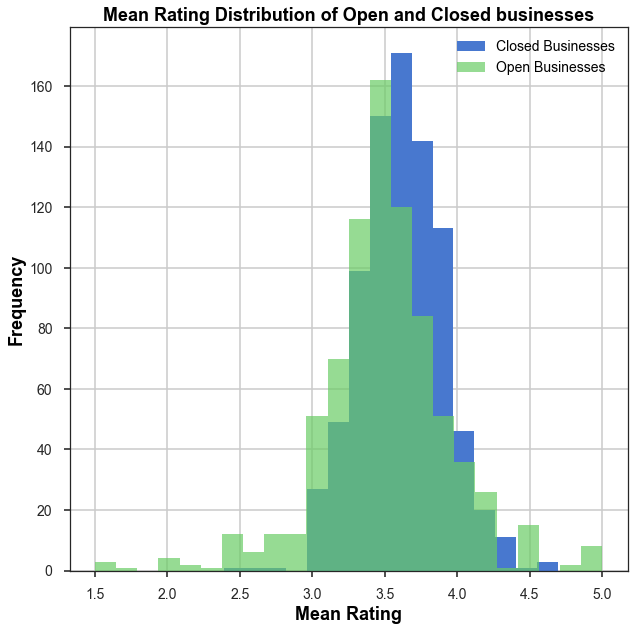

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

ZIPdf[myMask].plot(kind = 'hist', y = 'open_rating', bins = 16, ax = ax)
ZIPdf[myMask].plot(kind = 'hist', y = 'closed_rating', bins = 24, ax = ax, alpha = 0.7)



ax.legend(['Closed Businesses', 'Open Businesses'])
ax.set_title("Mean Rating Distribution of Open and Closed businesses")
ax.set_xlabel("Mean Rating")

<p>Let's take a quick look at the distribution of the Standard Deviation of stars in each area, this is an indicator of how similarly rated businesses in an area are.</p>
<p>Most of the businesses have a standard deviation around 1 star, this means about 68% of businesses fall within a star of the mean. This is actually relatively high, as that covers up 2/5 of the rating scale (1-5 stars).

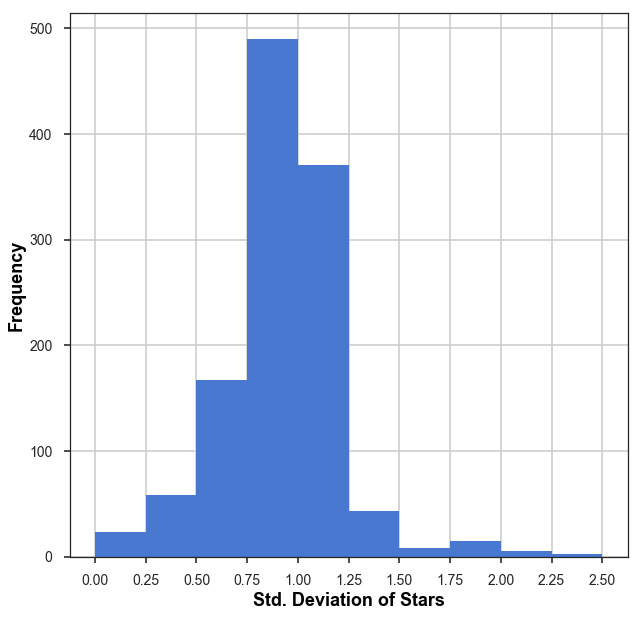

In [9]:
plot = ZIPdf.plot(kind = 'hist', y = 'std.dev_rating', bins = np.linspace(0,2.5,11), figsize = (10,10), legend = False)
plot.set_xlabel("Std. Deviation of Stars")
plot.set_xticks(np.linspace(0,2.5,11))


Below we can see the distribution of number of chains in our various areas. we can clearly see higher numbers of chains are less frequent.

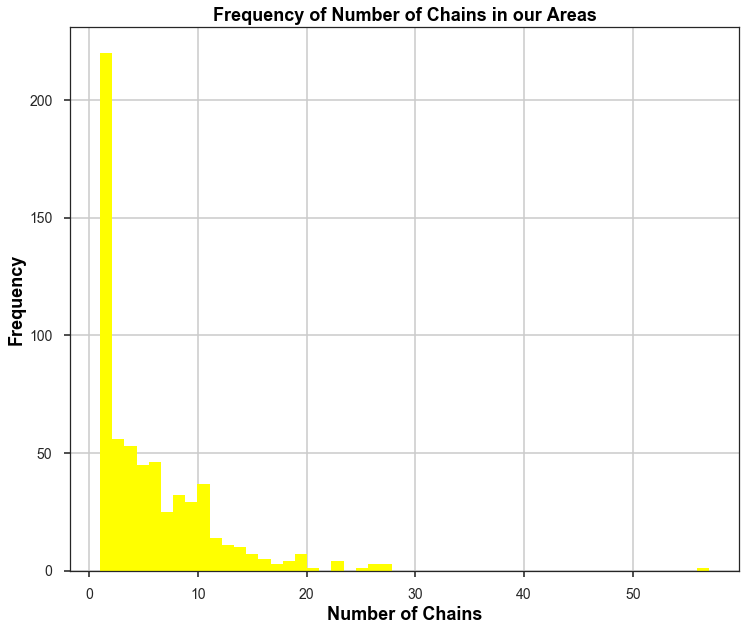

In [10]:
plot =ZIPdf[ZIPdf['num_chains'] > 0].plot(kind = 'hist', y = 'num_chains', figsize = (12,10), color = 'yellow', bins = 50, legend = False)
plot.set_title("Frequency of Number of Chains in our Areas")
plot.set_xlabel("Number of Chains")

## Are ratings clustered?

We saw earlier the distribution of standard deviation of ratings in areas. (This being an indicator of how similar ratings in an area are.) We saw that the majority fell around a standard deviation of 0.5 - 1.25
<p> Let's see how this is influenced by the number of businesses in an area.</p>

Below we'll group our businesses based on different ranges of Standard Dev. of Rating. We'll then find the mean number of businesses for these groups.

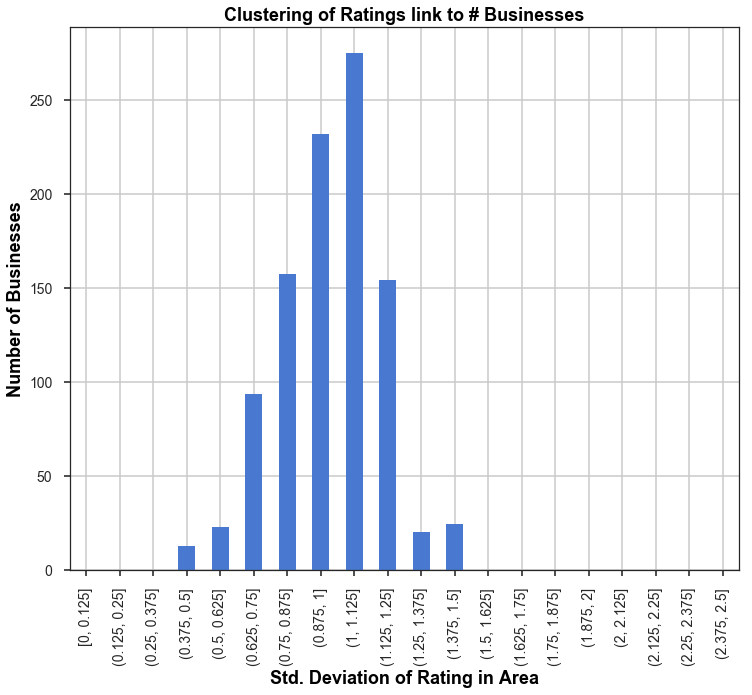

In [11]:
myMask = ZIPdf['num_businesses'] > 10
#Create a column defining the Standard Deviation range which an area falls into.
rangeColumn = pd.cut(x = ZIPdf['std.dev_rating'],bins=np.linspace(0,2.5,21), include_lowest=True)
ZIPdf['stdDevGroup'] = rangeColumn

plot = ZIPdf[myMask].groupby('stdDevGroup').agg({'num_businesses':'mean'}).plot(kind = 'bar', figsize = (12,10), legend = False)

plot.set_xlabel("Std. Deviation of Rating in Area")
plot.set_ylabel("Number of Businesses")
plot.set_title("Clustering of Ratings link to # Businesses")

As mean number of businesses in these groups increase, the standard deviation trends towards 1. However lower number of businesses does not indicate a higher or lower Standard Deviation of Area.
<p>So higher number of businesses seems to only suggest that an area is more likely to fall nearer the most frequently occurring standard deviation of ratings.</p>

Let's  take a look at the how different rating scores cluster;

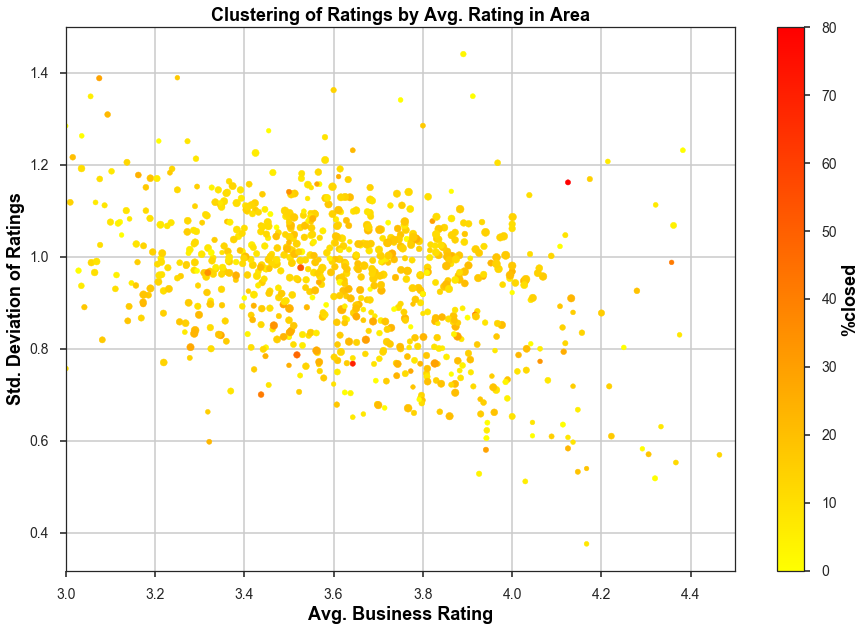

In [12]:
myMask = ZIPdf['num_businesses'] > 10

plot = ZIPdf[myMask].plot(kind = 'scatter',x = 'open_rating', y = 'std.dev_rating',c = "%closed",\
                        colormap = 'autumn_r', s = ZIPdf[myMask].num_businesses.apply(lambda x : 10*math.log(x, 3)),\
                        figsize = (15,10), xlim = (3.0,4.5), sharex = False)

plot.set_xlabel("Avg. Business Rating")
plot.set_ylabel("Std. Deviation of Ratings")
plot.set_title("Clustering of Ratings by Avg. Rating in Area")


It appears that as the rating of an area increases, it's more likely to have a lower Standard Deviation in ratings. Which is an indicator that higher rated areas tend to have more similarly rated areas than lower rated areas.

While we are interested in areas with more than 10 businesses, the areas with an average rating of less than 3 have under 10 businesses.
<p>It would be interesting to see if the trend is true of both extreme ends of the scale. As we approach an Avg. Business Rating of 1.0 would the standard deviation dip as well?  This would indicate that this higher level of clustering is usually necessary to achieve scores on either extreme of the scale.</p>

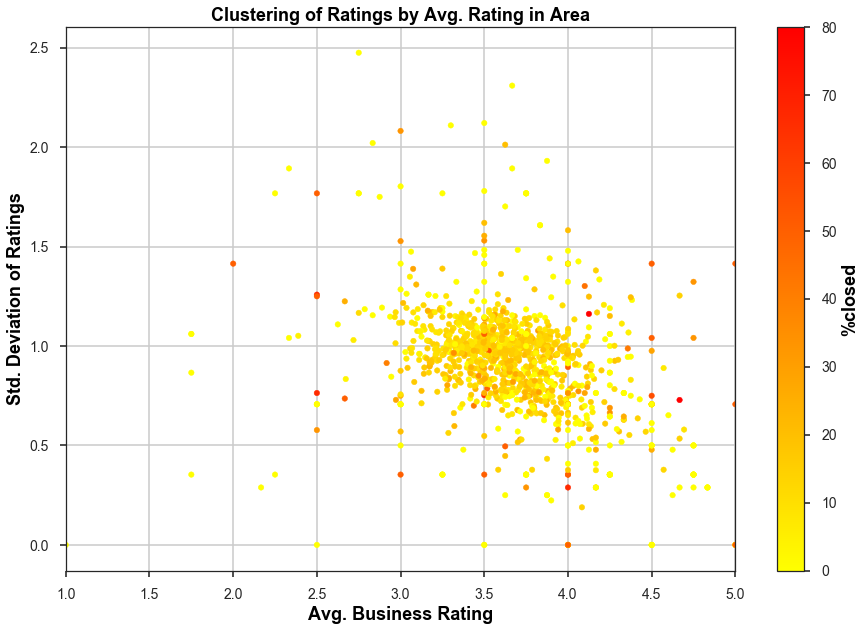

In [13]:
myMask = ZIPdf['num_businesses'] > 0

plot = ZIPdf[myMask].plot(kind = 'scatter',x = 'open_rating', y = 'std.dev_rating',c = "%closed",\
                        colormap = 'autumn_r', s = 30,\
                        figsize = (15,10), xlim = (1.0,5.0), sharex = False)

plot.set_xlabel("Avg. Business Rating")
plot.set_ylabel("Std. Deviation of Ratings")
plot.set_title("Clustering of Ratings by Avg. Rating in Area")

Unfortunately there isn't a massive amount of data on the lower end of the scale to tell for certain if the trend is present or not.

ROUGH WORK GRAPH

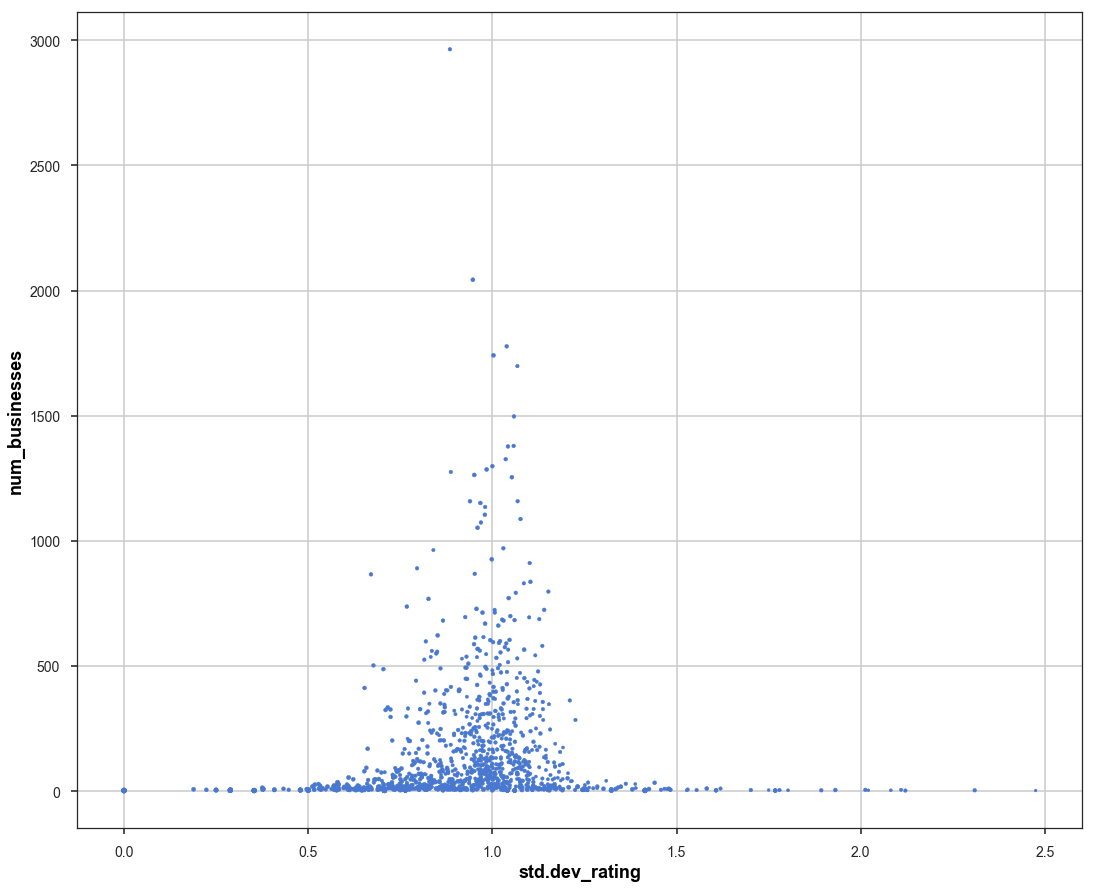

In [14]:
ZIPdf.plot(kind = 'scatter',x = 'std.dev_rating', y = 'num_businesses',s = ZIPdf.open_rating**2,  figsize = (18,15),)

## Are Closures / Performance linked to competition?

First, let's take a look at the distribution of % of businesses closed across the different ZIP codes. Most areas have a '% closed' between 0% and 30%

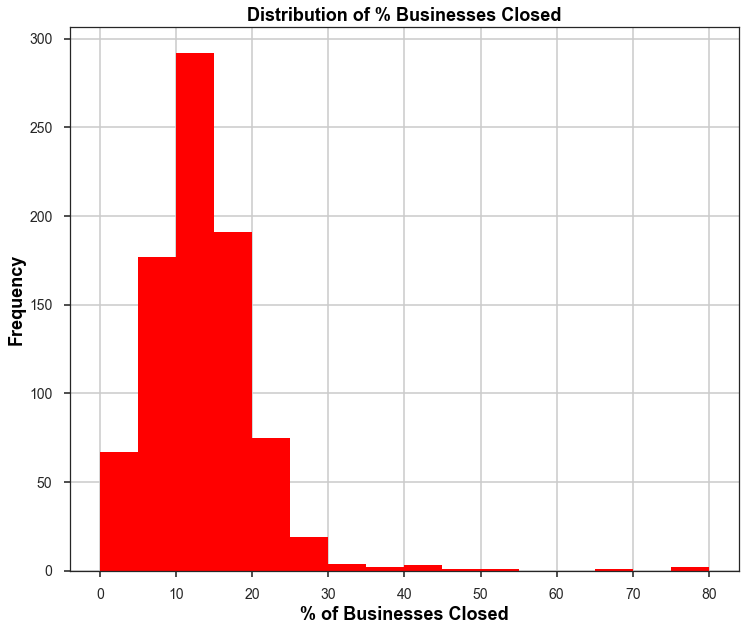

In [15]:
myMask = ZIPdf['num_businesses'] > 10
plot = ZIPdf[myMask].plot(kind = 'hist', y = '%closed', figsize = (12,10), color = 'red', bins = 16, legend = False)
plot.set_title("Distribution of % Businesses Closed")
plot.set_xlabel("% of Businesses Closed")

Below is the distribution of the average interactions ine ach area.

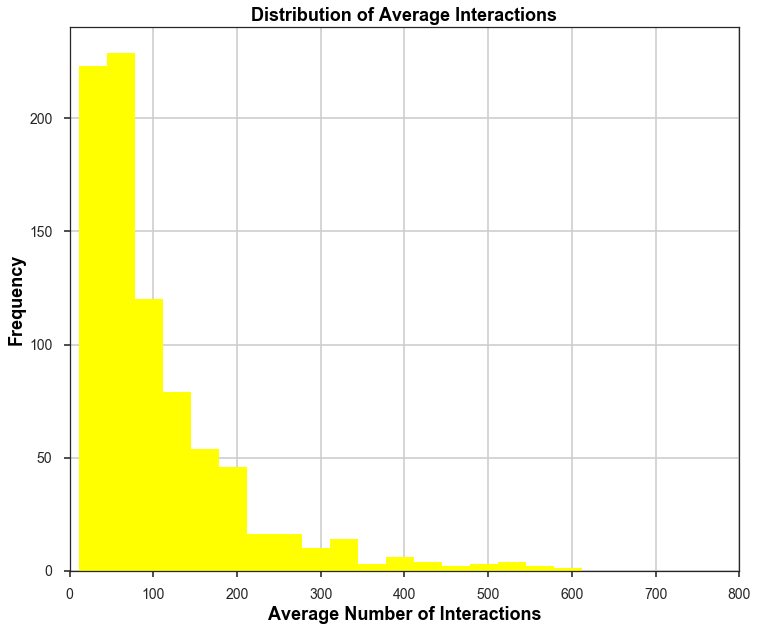

In [16]:
myMask = ZIPdf['num_businesses'] > 10
plot = ZIPdf[myMask].plot(kind = 'hist', y = 'num_interactions', figsize = (12,10), color = 'yellow', bins = 40, xlim = (0,800),\
                         legend = False)
plot.set_title("Distribution of Average Interactions")
plot.set_xlabel("Average Number of Interactions")

Below, we see how the number of businesses in an area is linked to the number of closures in the area. It seems that an being in an area with more competition around is connected to a higher probability of closure.

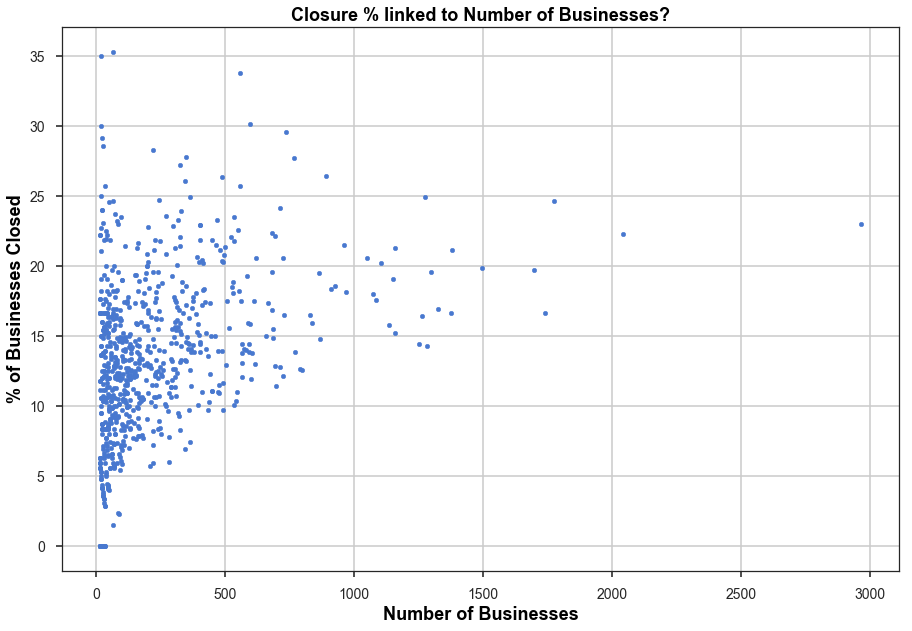

In [17]:
zipMask = (ZIPdf['num_businesses'] > 15) & (ZIPdf['open_rating'] > 3) & (ZIPdf['open_rating'] < 4.2) &\
(ZIPdf['%closed'] < 40)

plot = ZIPdf[zipMask].plot(kind = 'scatter', x = 'num_businesses', y = '%closed', figsize = (15,10))
plot.set_title("Closure % linked to Number of Businesses?")
plot.set_ylabel("% of Businesses Closed")
plot.set_xlabel("Number of Businesses")

However, we also see a level of correlation with the average number of interactions as well. So despite this added risk of closure, it also looks like there is an increased level of customer interaction.

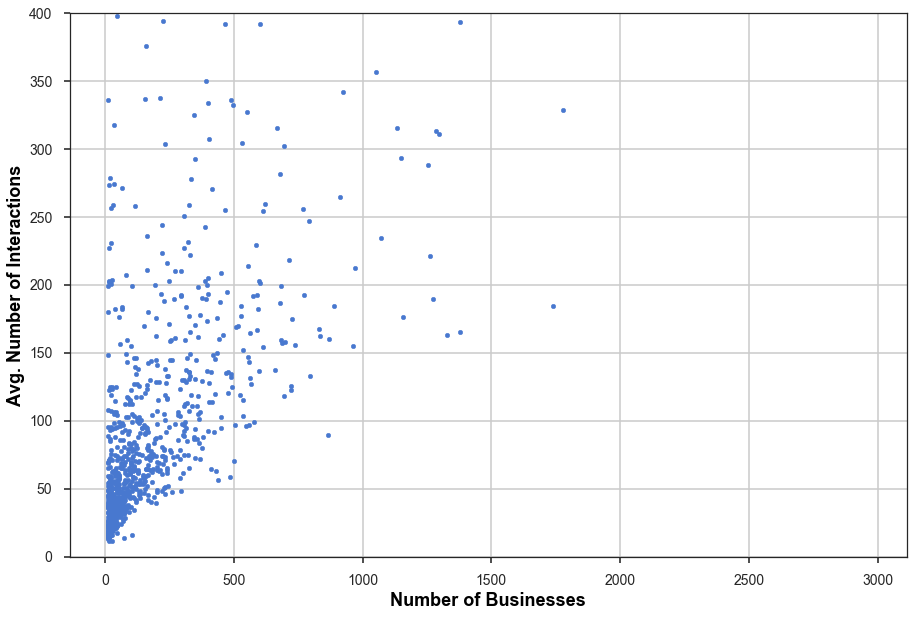

In [18]:
myMask = (ZIPdf['num_businesses'] > 10)
plot = ZIPdf[myMask].plot(kind = 'scatter', y = 'num_interactions', x = 'num_businesses', figsize = (15,10),\
                                    ylim = (0,400))

plot.set_ylabel("Avg. Number of Interactions")
plot.set_xlabel("Number of Businesses")

Below, we look at how the ratings of open businesses in an area relates to the rating of closed businesses.

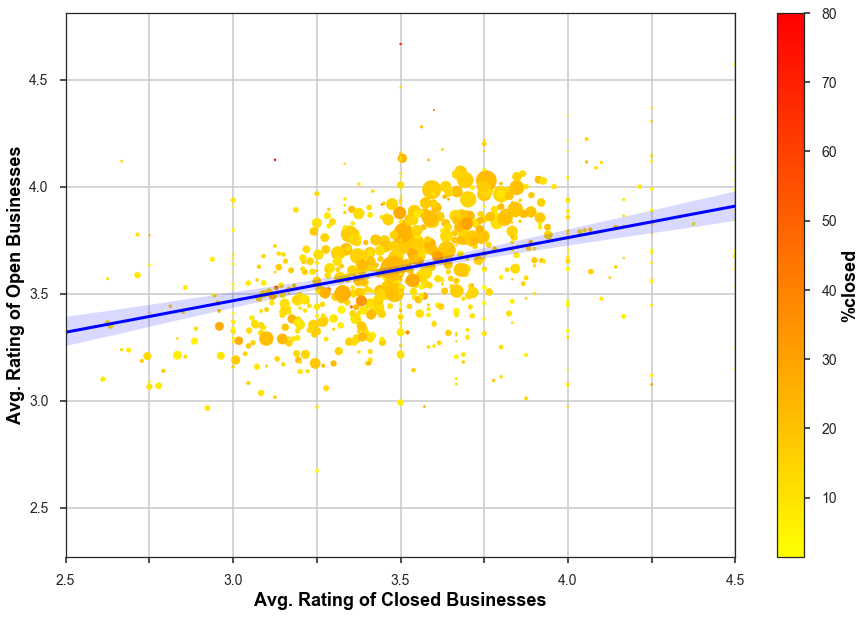

In [36]:
avgRatingMask = (ZIPdf['num_businesses'] > 10) & (ZIPdf['%closed'] < 100)
plot = ZIPdf[avgRatingMask].plot(kind = 'scatter', x = 'closed_rating', y = 'open_rating', sharex = False,\
         xlim = (2.5,4.5), s = ZIPdf[avgRatingMask].num_businesses/5, c = "%closed", colormap = 'autumn_r',\
                                    figsize = (15,10))


sns.regplot(ZIPdf[avgRatingMask]['closed_rating'],ZIPdf[avgRatingMask]['open_rating'], scatter = False, color = 'blue')

plot.set_xlabel("Avg. Rating of Closed Businesses")
plot.set_ylabel("Avg. Rating of Open Businesses")
plot.set_xticklabels([2.5,"",3.0,"",3.5,"",4.0,"",4.5])

fig = plot.get_figure()
fig.savefig('../../data/analysis/OpenRating_vs_ClosedRating.png')

We see above that the ratings of closed businesses in an area, are typically slightly less than the open businesses. However not by a very large amount.

Next, we compare the number of reviews with the percentage of businesses closed.
There does appear to be slight positive correlation between them, perhaps areas that are more likely to get reviews have more discerning customers that could lead to closures.

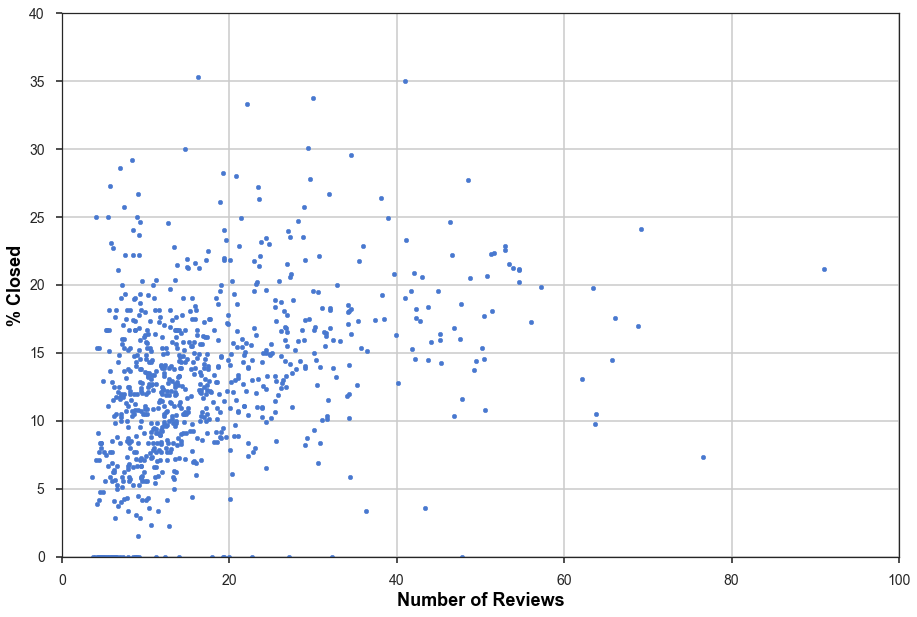

In [20]:
interactionMask = (ZIPdf['num_businesses'] > 10)
plot = ZIPdf[interactionMask].plot(kind = 'scatter', y = '%closed', x = 'num_reviews', figsize = (15,10), xlim = (0,100),\
                                   ylim = (0, 40))

plot.set_ylabel("% Closed")
plot.set_xlabel("Number of Reviews")

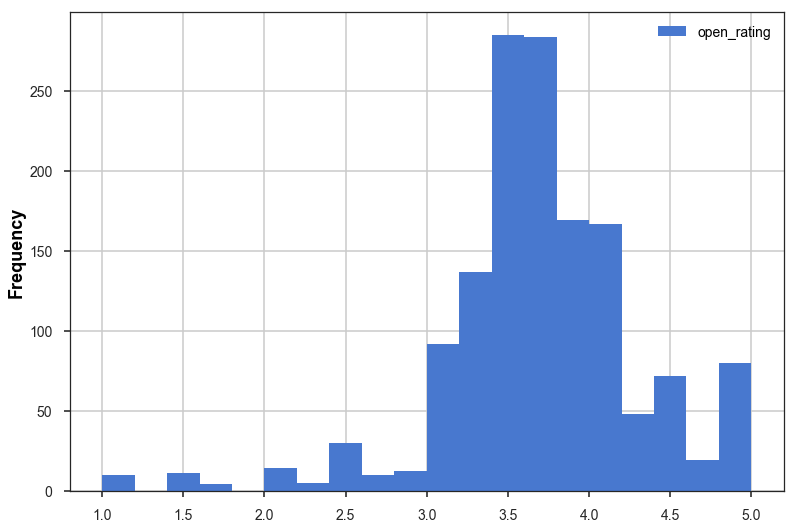

In [21]:
ZIPdf[ZIPdf['num_interactions'] < 500].plot(kind = 'hist', bins = 20, y = 'open_rating')

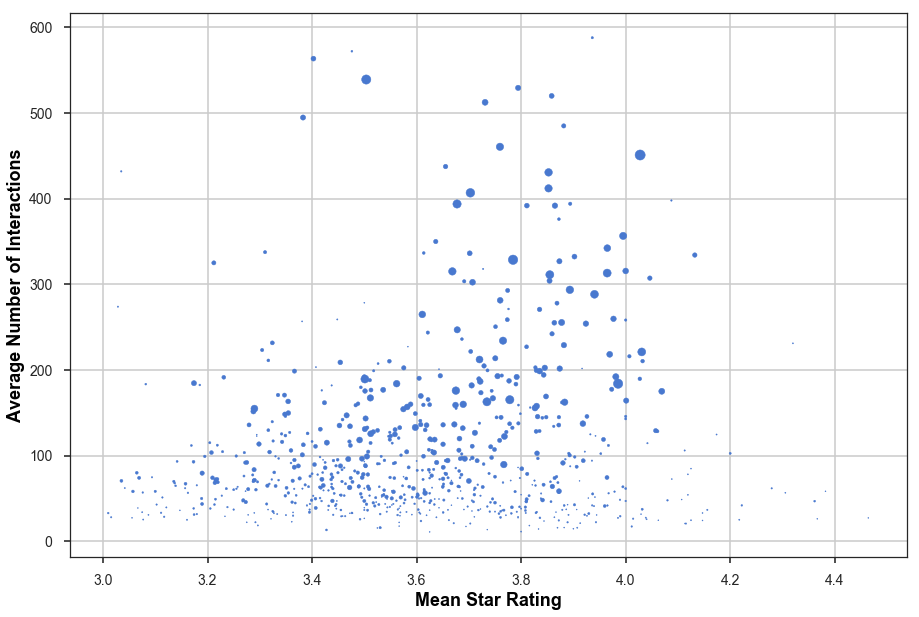

In [22]:



zipMask = (ZIPdf['num_businesses'] > 15) & (ZIPdf['open_rating'] > 3) & (ZIPdf['open_rating'] < 4.5) &\
(ZIPdf['num_checkins'] < 400)

plot = ZIPdf[zipMask].plot(kind = 'scatter', x = 'open_rating', y = 'num_interactions', figsize = (15,10),\
                    s = ZIPdf[zipMask]['num_businesses']/20)

plot.set_xlabel("Mean Star Rating", visible = True)
plot.set_ylabel("Average Number of Interactions")

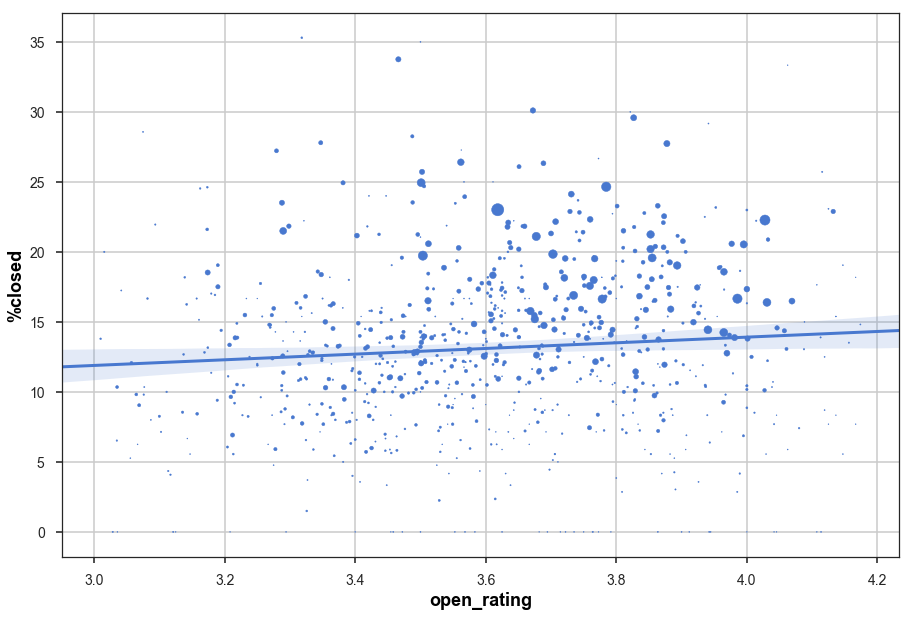

In [23]:
zipMask = (ZIPdf['num_businesses'] > 10) & (ZIPdf['open_rating'] > 3) & (ZIPdf['open_rating'] < 4.2) &\
(ZIPdf['%closed'] < 40)

plot = ZIPdf[zipMask].plot(kind = 'scatter', x = 'open_rating', y = '%closed', figsize = (15,10),\
                    s = ZIPdf[zipMask]['num_businesses']/20)

plot.set_xlabel("Mean Star Rating", visible = True)
sns.regplot(ZIPdf[zipMask]['open_rating'], ZIPdf[zipMask]['%closed'], scatter = False)

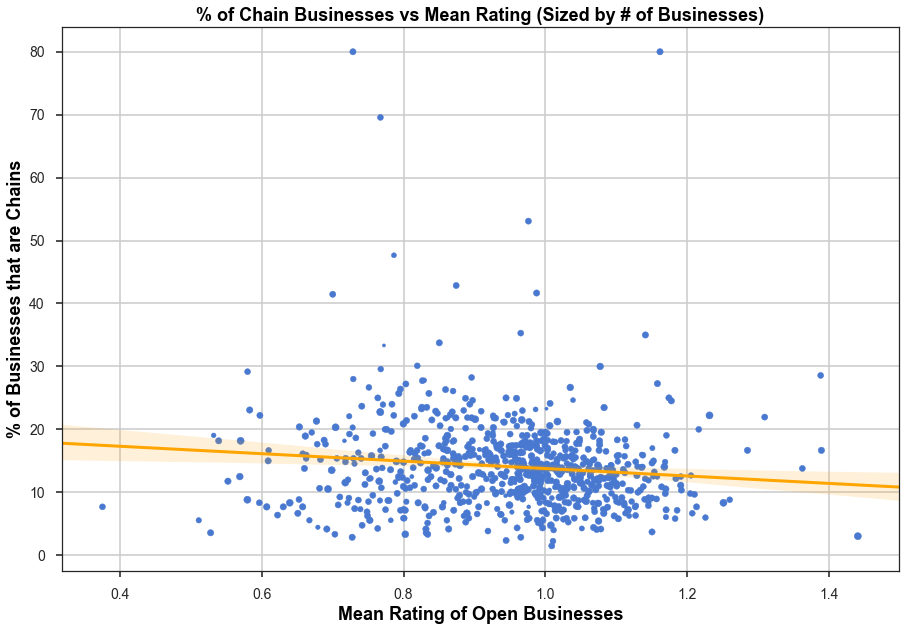

In [35]:
myMask = (ZIPdf['num_businesses'] > 10) &  (ZIPdf['%closed'] > 0)
plot = ZIPdf[myMask].plot(kind = 'scatter', y = '%closed', x = 'std.dev_rating', figsize = (15,10), s = ZIPdf.open_rating * 10)
sns.regplot(ZIPdf[myMask]['std.dev_rating'],ZIPdf[myMask]['%closed'], scatter = False, color = 'orange')
plot.set_title("% of Chain Businesses vs Mean Rating (Sized by # of Businesses)")
plot.set_xlabel("Mean Rating of Open Businesses")
plot.set_ylabel("% of Businesses that are Chains")

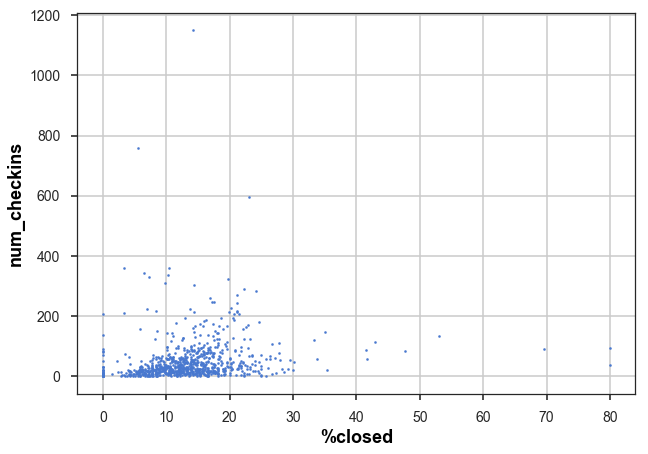

In [25]:
ZIPdf[ZIPdf['num_businesses'] > 10].plot(kind = 'scatter', x = '%closed', y = 'num_checkins', figsize = (10,7), s = 4)

## Effect of chain franchises

In investigating this, we'll be focusing on areas that have at least 1 chain franchise present.

In [26]:
chainMask = (ZIPdf['%chains'] > 0) &  (ZIPdf['num_businesses'] > 10)

Below we compare the percentage of chains in an area against the star ratings. We see that it's less likely to find chains in higher rated areas. Do chains succeed in these areas because their competition is of a lower standard?

Size indicates the number of businesses in the area.

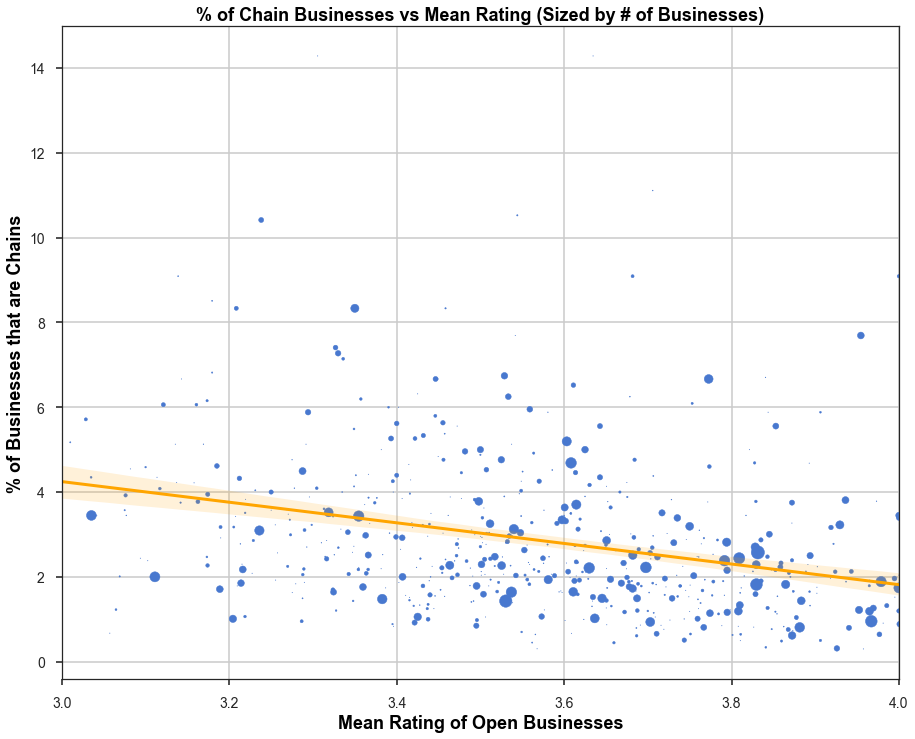

In [27]:
plot = ZIPdf[chainMask].plot(kind = 'scatter', x = 'open_rating', y = '%chains', figsize = (15,12), s = ZIPdf.num_businesses/5,\
                     xlim = (3.0,4.0))
sns.regplot(ZIPdf[chainMask]['open_rating'],ZIPdf[chainMask]['%chains'], scatter = False, color = 'orange')
plot.set_title("% of Chain Businesses vs Mean Rating (Sized by # of Businesses)")
plot.set_xlabel("Mean Rating of Open Businesses")
plot.set_ylabel("% of Businesses that are Chains")


Below we compare the % of chains in an area with the % of businesses that are closed. It appears that a higher percentage of chains in an area has a slight link to less businesses being closed.

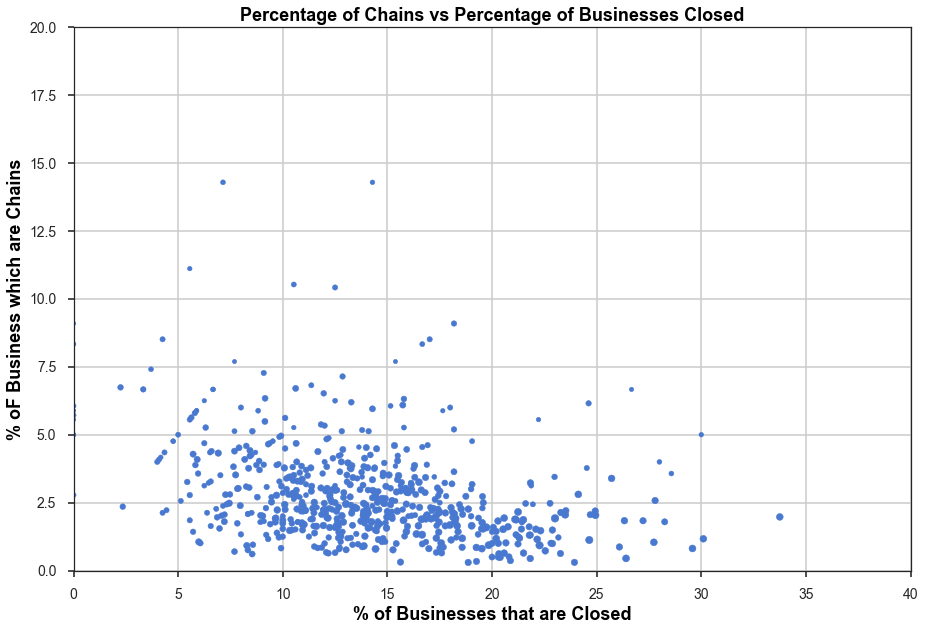

In [34]:
plot = ZIPdf[chainMask].plot(kind = 'scatter', x = '%closed', y = '%chains', figsize = (15,10),\
                      s = ZIPdf[chainMask]['num_businesses'].apply(lambda x : math.log(x, 3)*8), xlim = (0, 40), ylim = (0,20))
plot.set_title("Percentage of Chains vs Percentage of Businesses Closed")
plot.set_xlabel("% of Businesses that are Closed")
plot.set_ylabel("% oF Business which are Chains")

Below, it appears that chain businesses dominate smaller areas. The shape produced seems very unique, with some noticeable lines drawn by several businesses located side by side in the graph. Could these trends be trends in different areas like states?

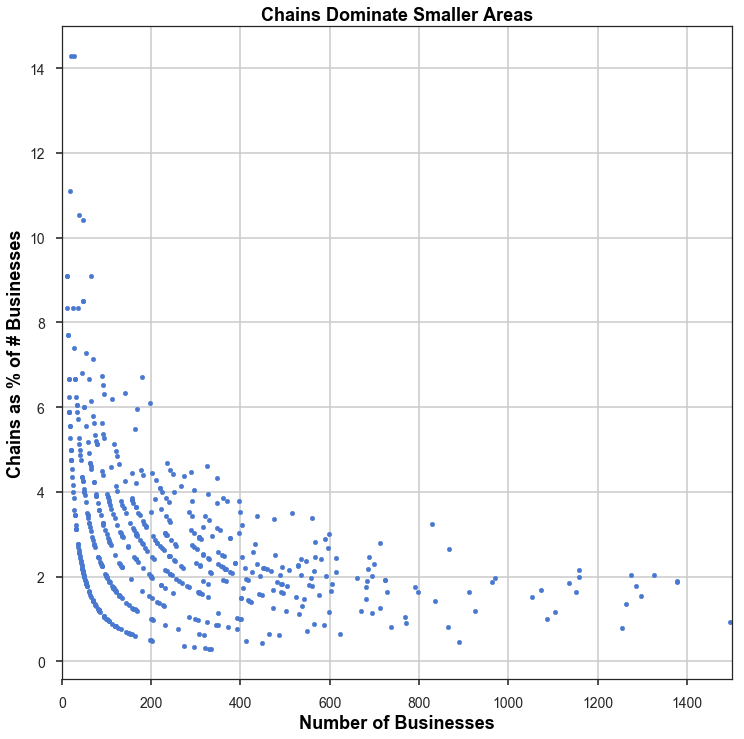

In [29]:
plot = ZIPdf[chainMask].plot(kind = 'scatter', x = 'num_businesses', y = '%chains', figsize = (12,12), xlim = (0,1500))
plot.set_title("Chains Dominate Smaller Areas")
plot.set_xlabel("Number of Businesses")
plot.set_ylabel("Chains as % of # Businesses")

There are a few too many states to represent distinctly by colour, but nonetheless there doesn't seem to be any connection between these individual lines and the state.

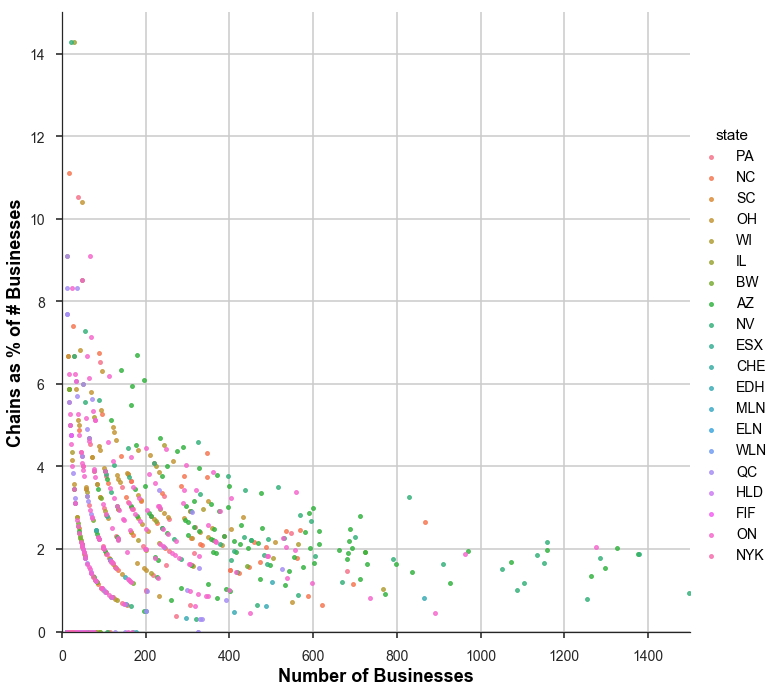

In [30]:
 snsMask = (ZIPdf['%chains'] < 20) & (ZIPdf['num_businesses'] > 10)
plot = sns.lmplot( y ="%chains", x="num_businesses", data=ZIPdf[snsMask], fit_reg=False, legend=True, hue = 'state',\
                            size = 10, scatter_kws = {"s":15,})

plot = (plot.set_axis_labels("Number of Businesses", "Chains as % of # Businesses").set(xlim=(0, 1500), ylim=(0, 15)).fig)


Below we see that areas with a higher % of chains are somewhat more likely to have higher levels of standard deviation in their ratings which is a sign of less consistent business ratings in an area.

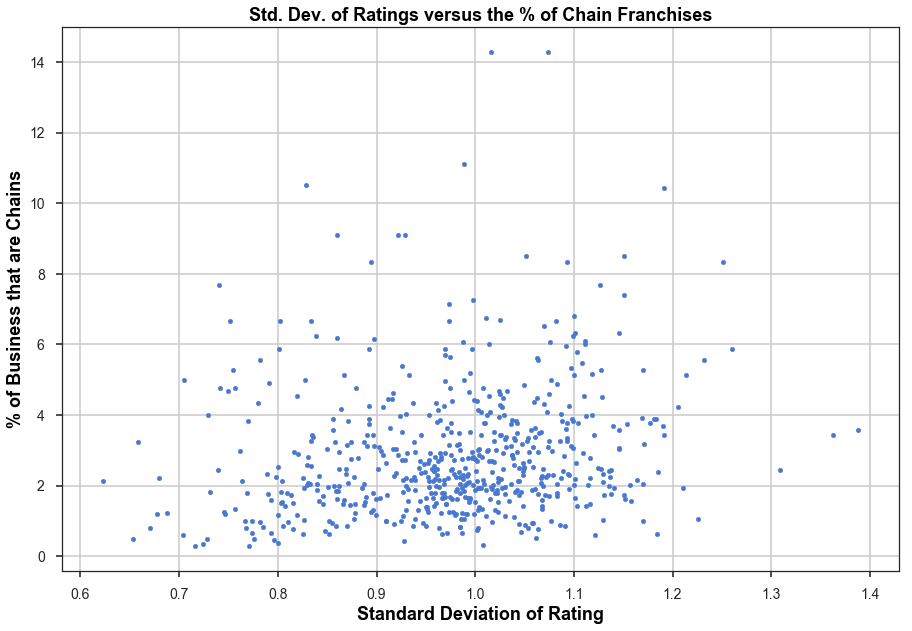

In [31]:
plot = ZIPdf[chainMask].plot(kind = 'scatter', x = 'std.dev_rating', y = '%chains', figsize = (15,10))
plot.set_title("Std. Dev. of Ratings versus the % of Chain Franchises")
plot.set_xlabel("Standard Deviation of Rating")
plot.set_ylabel("% of Business that are Chains")

We can see below that businesses with particularly high percentages of chains (8%+), seem to fall towards the lower end of the scale in terms of mean number of interactions.

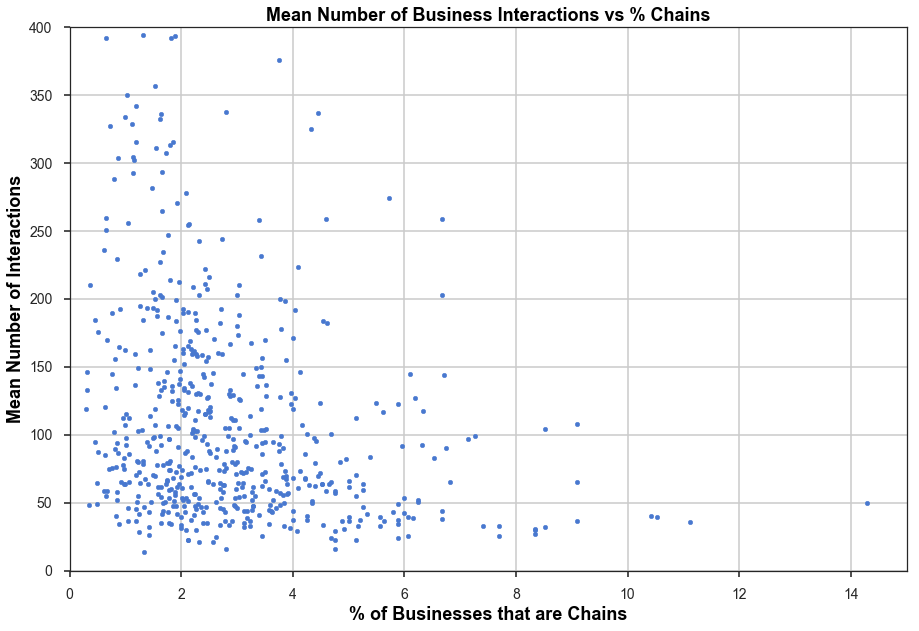

In [32]:
plot = ZIPdf[chainMask].plot(kind = 'scatter', y = 'num_interactions', x = '%chains', figsize = (15,10),\
                                  xlim = (0,15),ylim = (0,400))
plot.set_title("Mean Number of Business Interactions vs % Chains")
plot.set_xlabel("% of Businesses that are Chains")
plot.set_ylabel("Mean Number of Interactions")